In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/weatherAUS.csv')
print(df.shape)

(145460, 23)


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<Axes: xlabel='RainTomorrow', ylabel='count'>

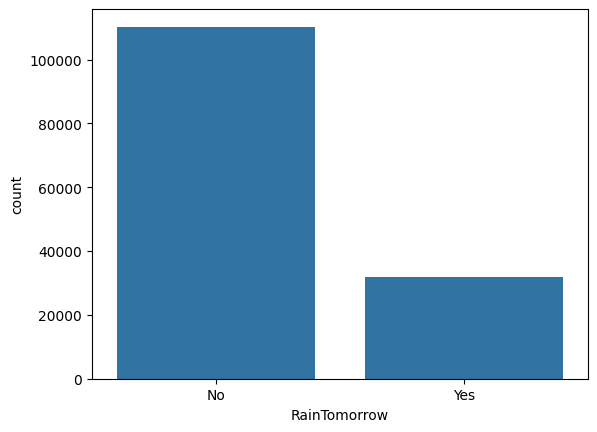

In [7]:
sns.countplot(x='RainTomorrow', data=df)

In [8]:
cat_cols = df.select_dtypes(exclude=np.number).columns
cat_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df[cat_cols].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-06-24,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [10]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [11]:
temp_df = df[num_cols]
temp_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [12]:
temp_df.shape

(145460, 16)

In [13]:
temp_df['RainToday'] = df['RainToday'].replace({'No':0, 'Yes':1})
temp_df['RainTomorrow'] = df['RainTomorrow'].replace({'No':0, 'Yes':1})

Text(0.5, 1.0, 'Feature Correlation')

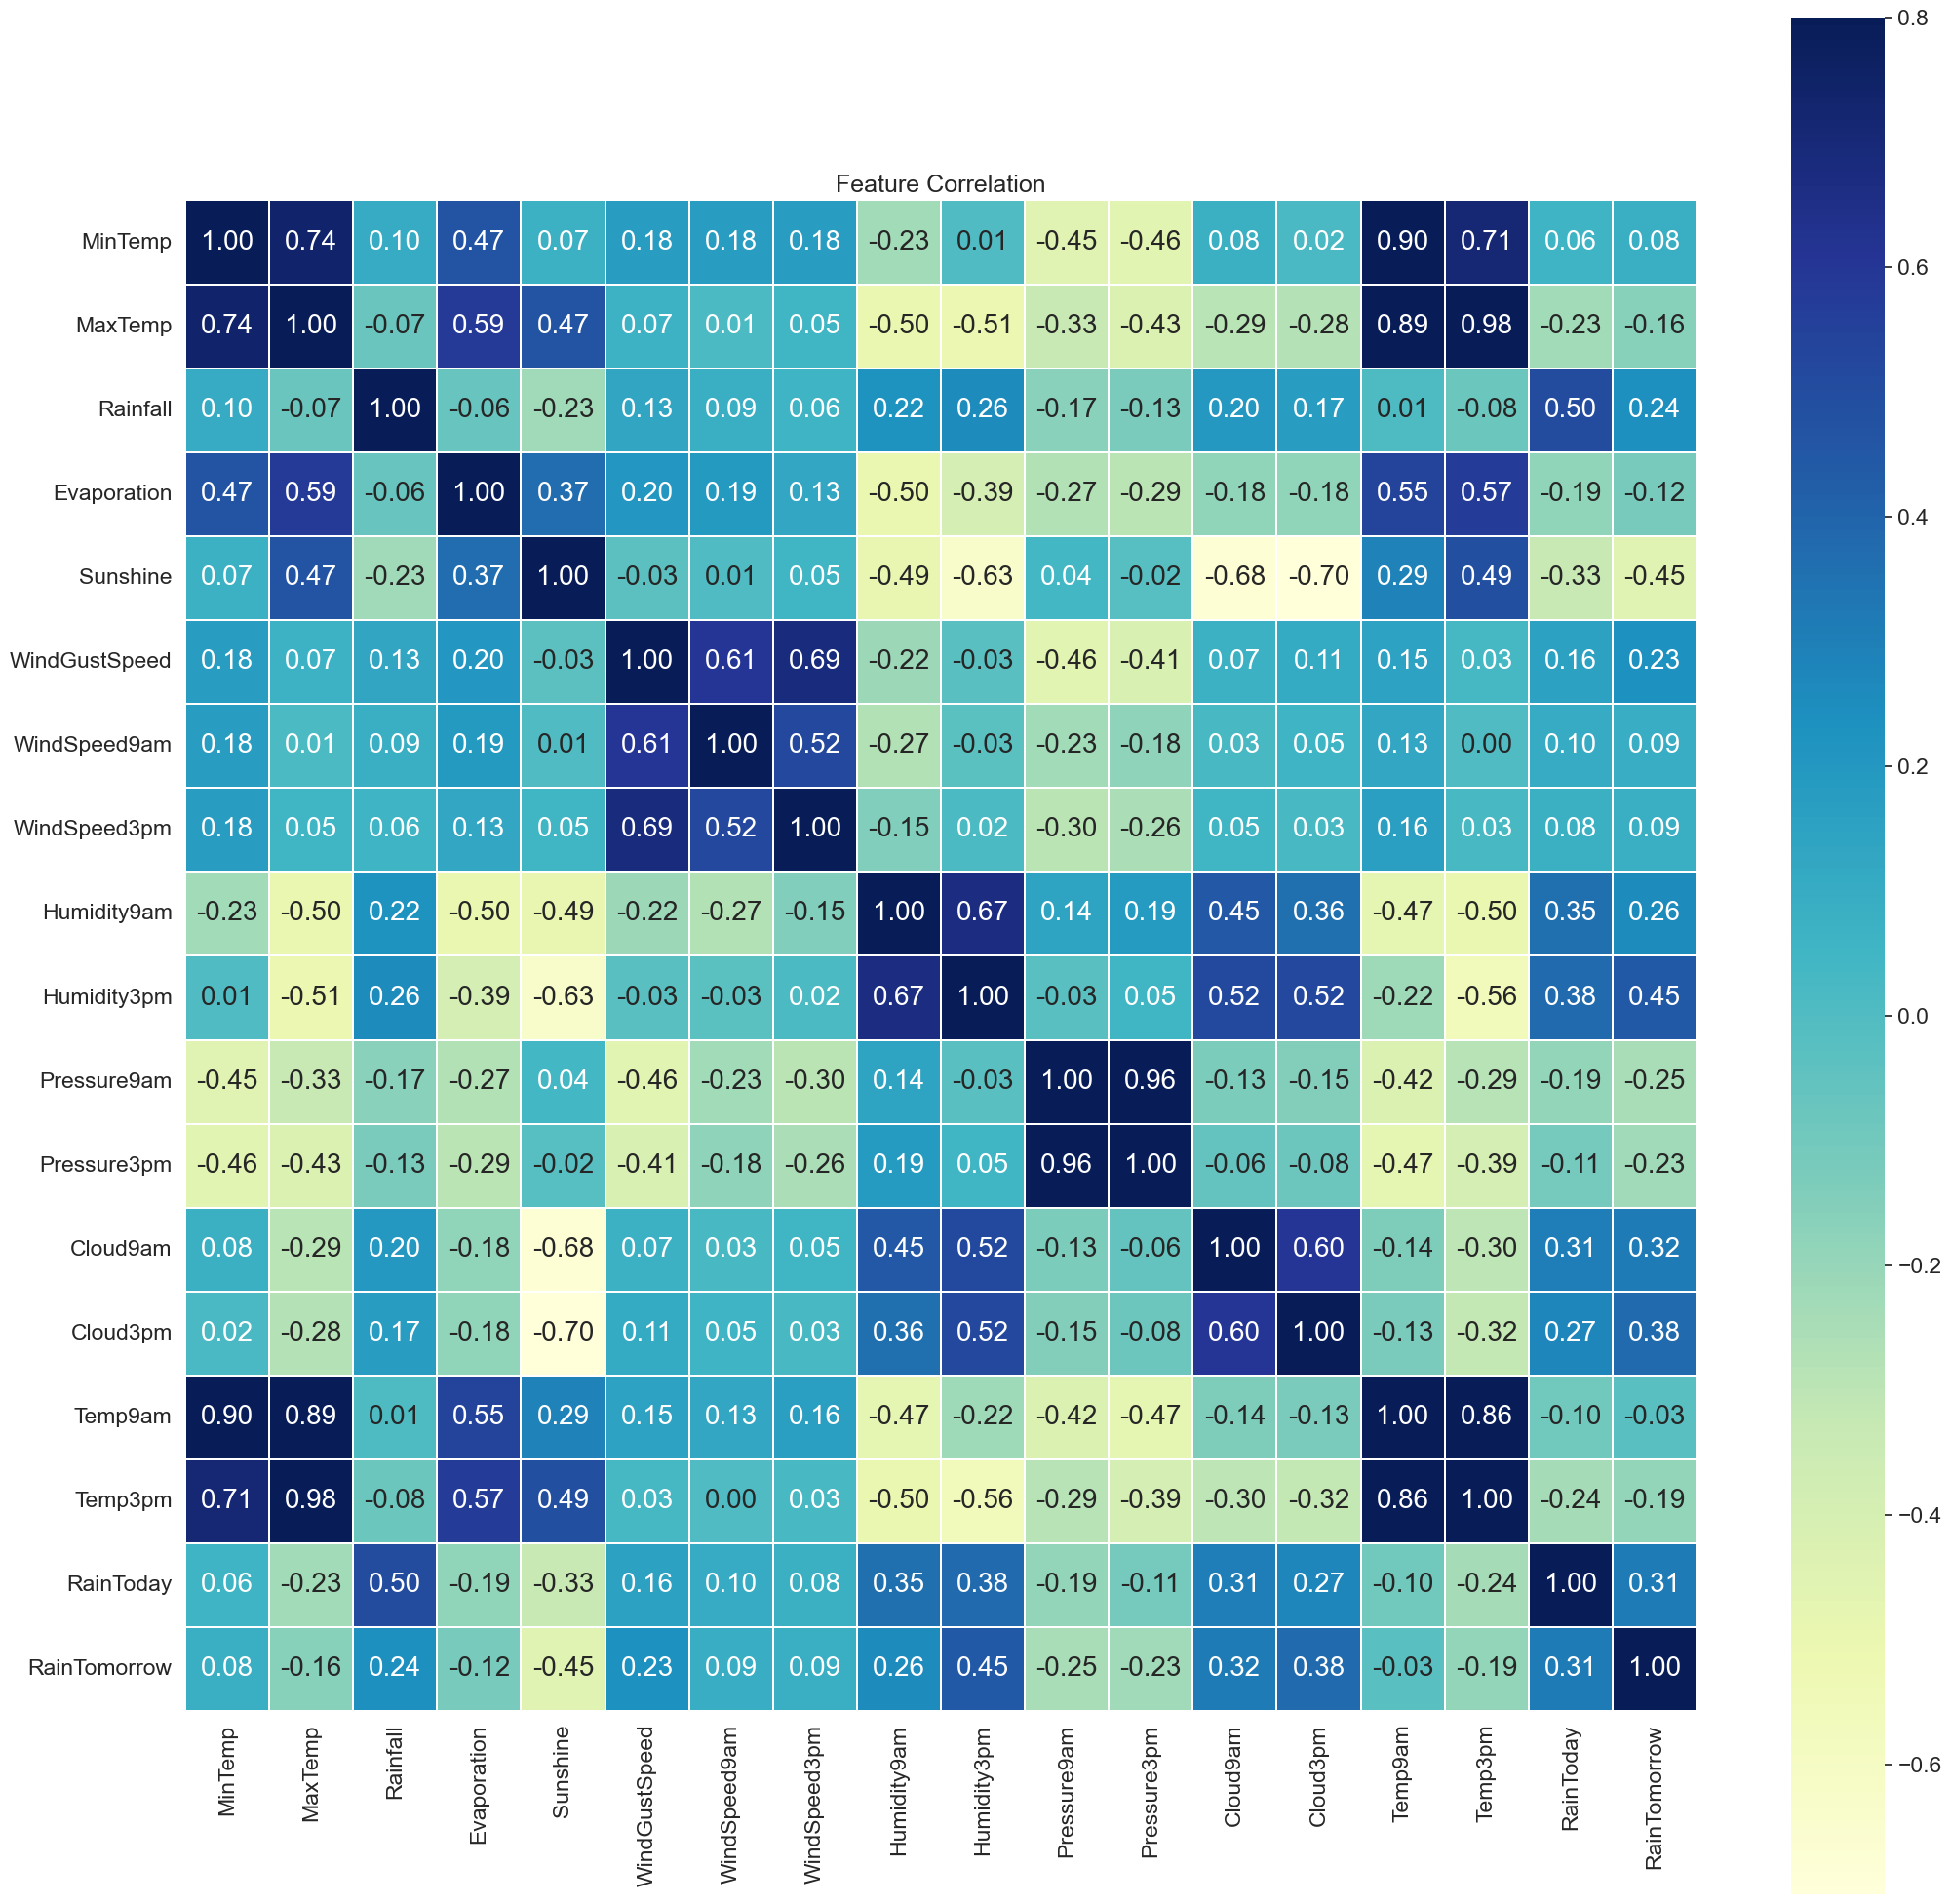

In [14]:
corr = temp_df.corr()
plt.figure(figsize=(25,25))
sns.set(font_scale=1.5)
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            fmt = '.2f',
            annot_kws={'size':20},
            cmap='YlGnBu')
plt.title('Feature Correlation')

In [15]:
corr.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [16]:
corr.query('RainTomorrow > 0.3 or RainTomorrow < -0.3').index.values.tolist()

['Sunshine',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'RainTomorrow']

<Axes: ylabel='Sunshine'>

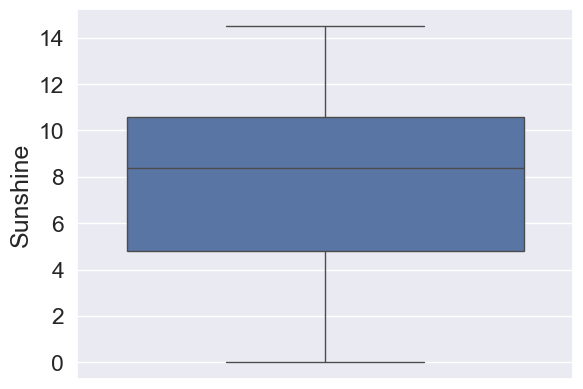

In [17]:
sns.boxplot(data=df, y='Sunshine')

In [18]:
df.shape

(145460, 23)

In [19]:
print(cat_cols)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [20]:
print(num_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


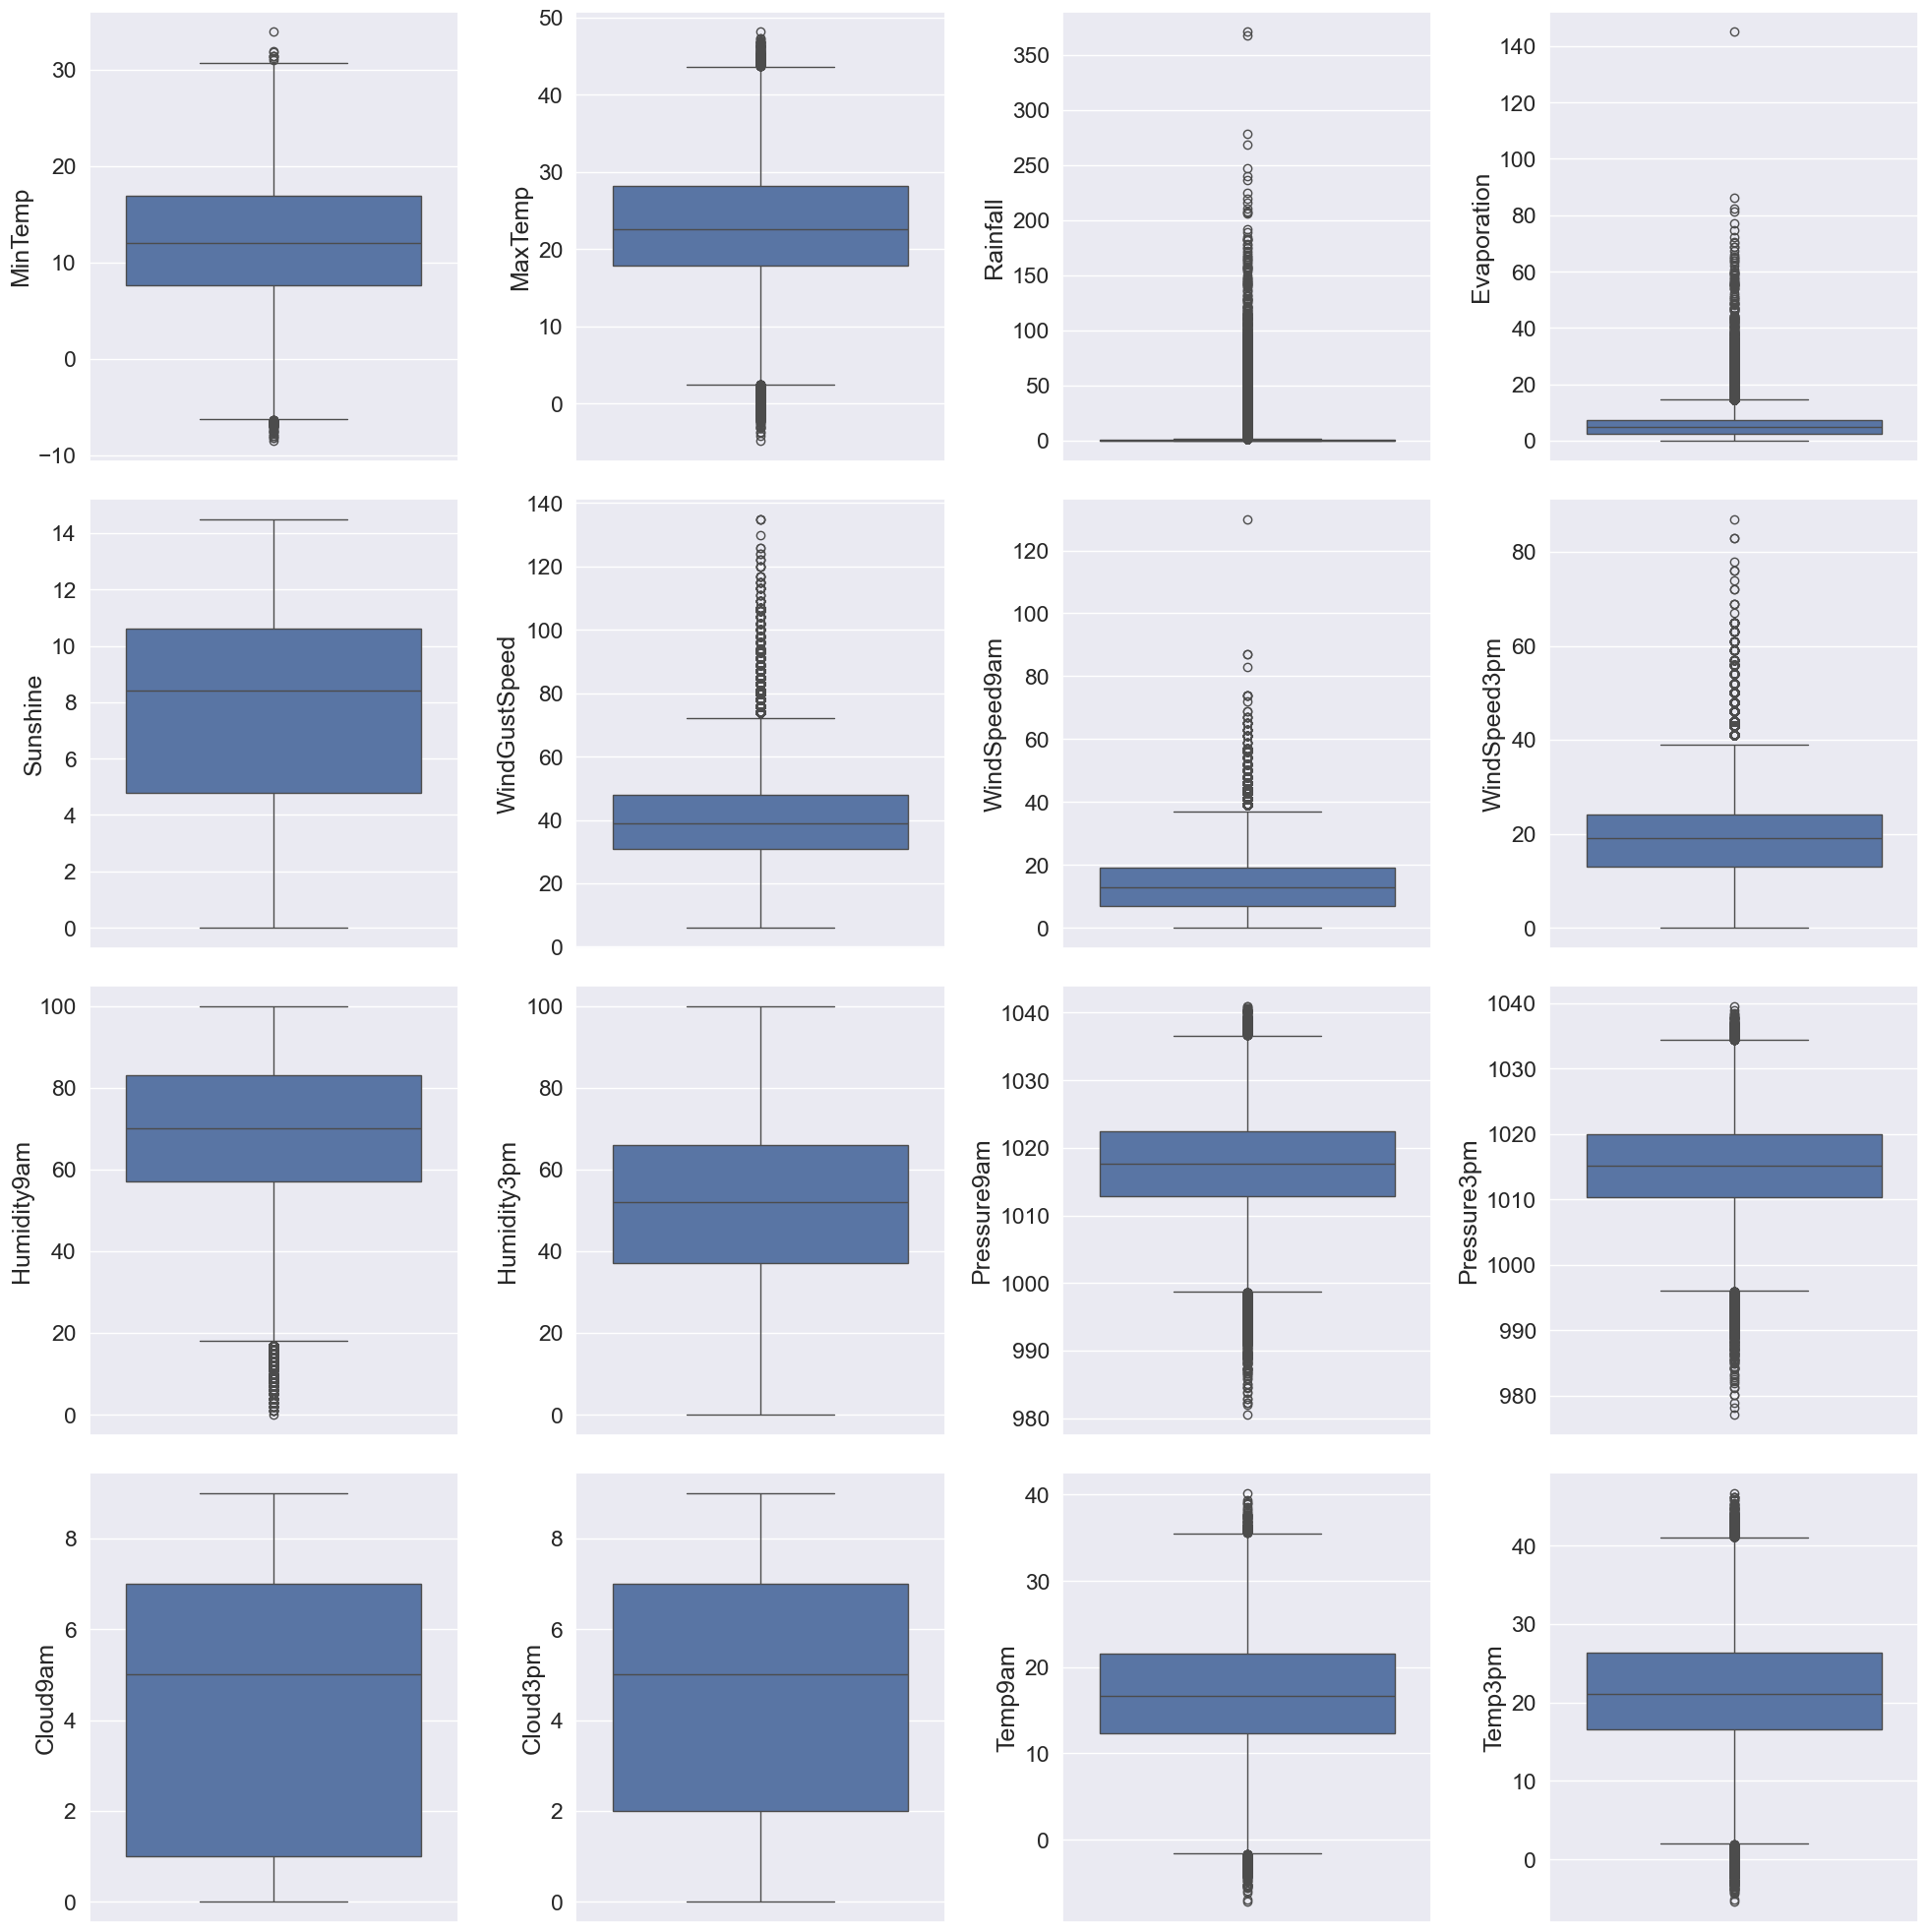

In [21]:
nrows, ncols = 4, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,20)

axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axs[i])

plt.tight_layout()
plt.show()

In [22]:
df['Rainfall'].max()

np.float64(371.0)

In [23]:
df['Rainfall'].mean()

np.float64(2.3609181499166656)

In [24]:
df['Rainfall'].median()

np.float64(0.0)

In [25]:
df.shape

(145460, 23)

In [26]:
filtered_rainfall = df.query('Rainfall != 0.0').copy()

In [27]:
filtered_rainfall.shape

(54380, 23)

In [28]:
filtered_rainfall.index

Index([     0,      4,      5,      9,     11,     12,     13,     15,     17,
           18,
       ...
       145323, 145324, 145325, 145326, 145336, 145391, 145392, 145393, 145394,
       145429],
      dtype='int64', length=54380)

In [29]:
filtered_rainfall.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No


In [30]:
df = pd.read_csv('data/weatherAUS.csv')
print(df.shape)

(145460, 23)


In [31]:
def get_outlier_indices(data, columns):
    outlier_indices = []
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        min_value = Q1 - 1.5*IQR
        max_value = Q3 + 1.5*IQR
        filter = ((data[column] < min_value) | (data[column] > max_value))

        outlier_data = data[column][filter]
        outlier_index = outlier_data.index
        outlier_indices.extend(outlier_index)

    return outlier_indices

In [32]:
print('dataframe before removing outlier (Rainfall column) :', df.shape)
delete_indices = get_outlier_indices(filtered_rainfall, ['Rainfall'])

dataframe before removing outlier (Rainfall column) : (145460, 23)


In [33]:
df = df.drop(delete_indices, axis=0).reset_index(drop=True)
print('dataframe after removing outlier (Rainfall column)j :', df.shape)

dataframe after removing outlier (Rainfall column)j : (140240, 23)


In [34]:
print('dataframe before removing outlier (etc) :', df.shape)
delete_indices = get_outlier_indices(df, ['Humidity9am','Evaporation', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm'])

dataframe before removing outlier (etc) : (140240, 23)


In [35]:
df = df.drop(delete_indices, axis=0).reset_index(drop=True)
print('dataframe after removing outlier (etc) :', df.shape)

dataframe after removing outlier (etc) : (133529, 23)


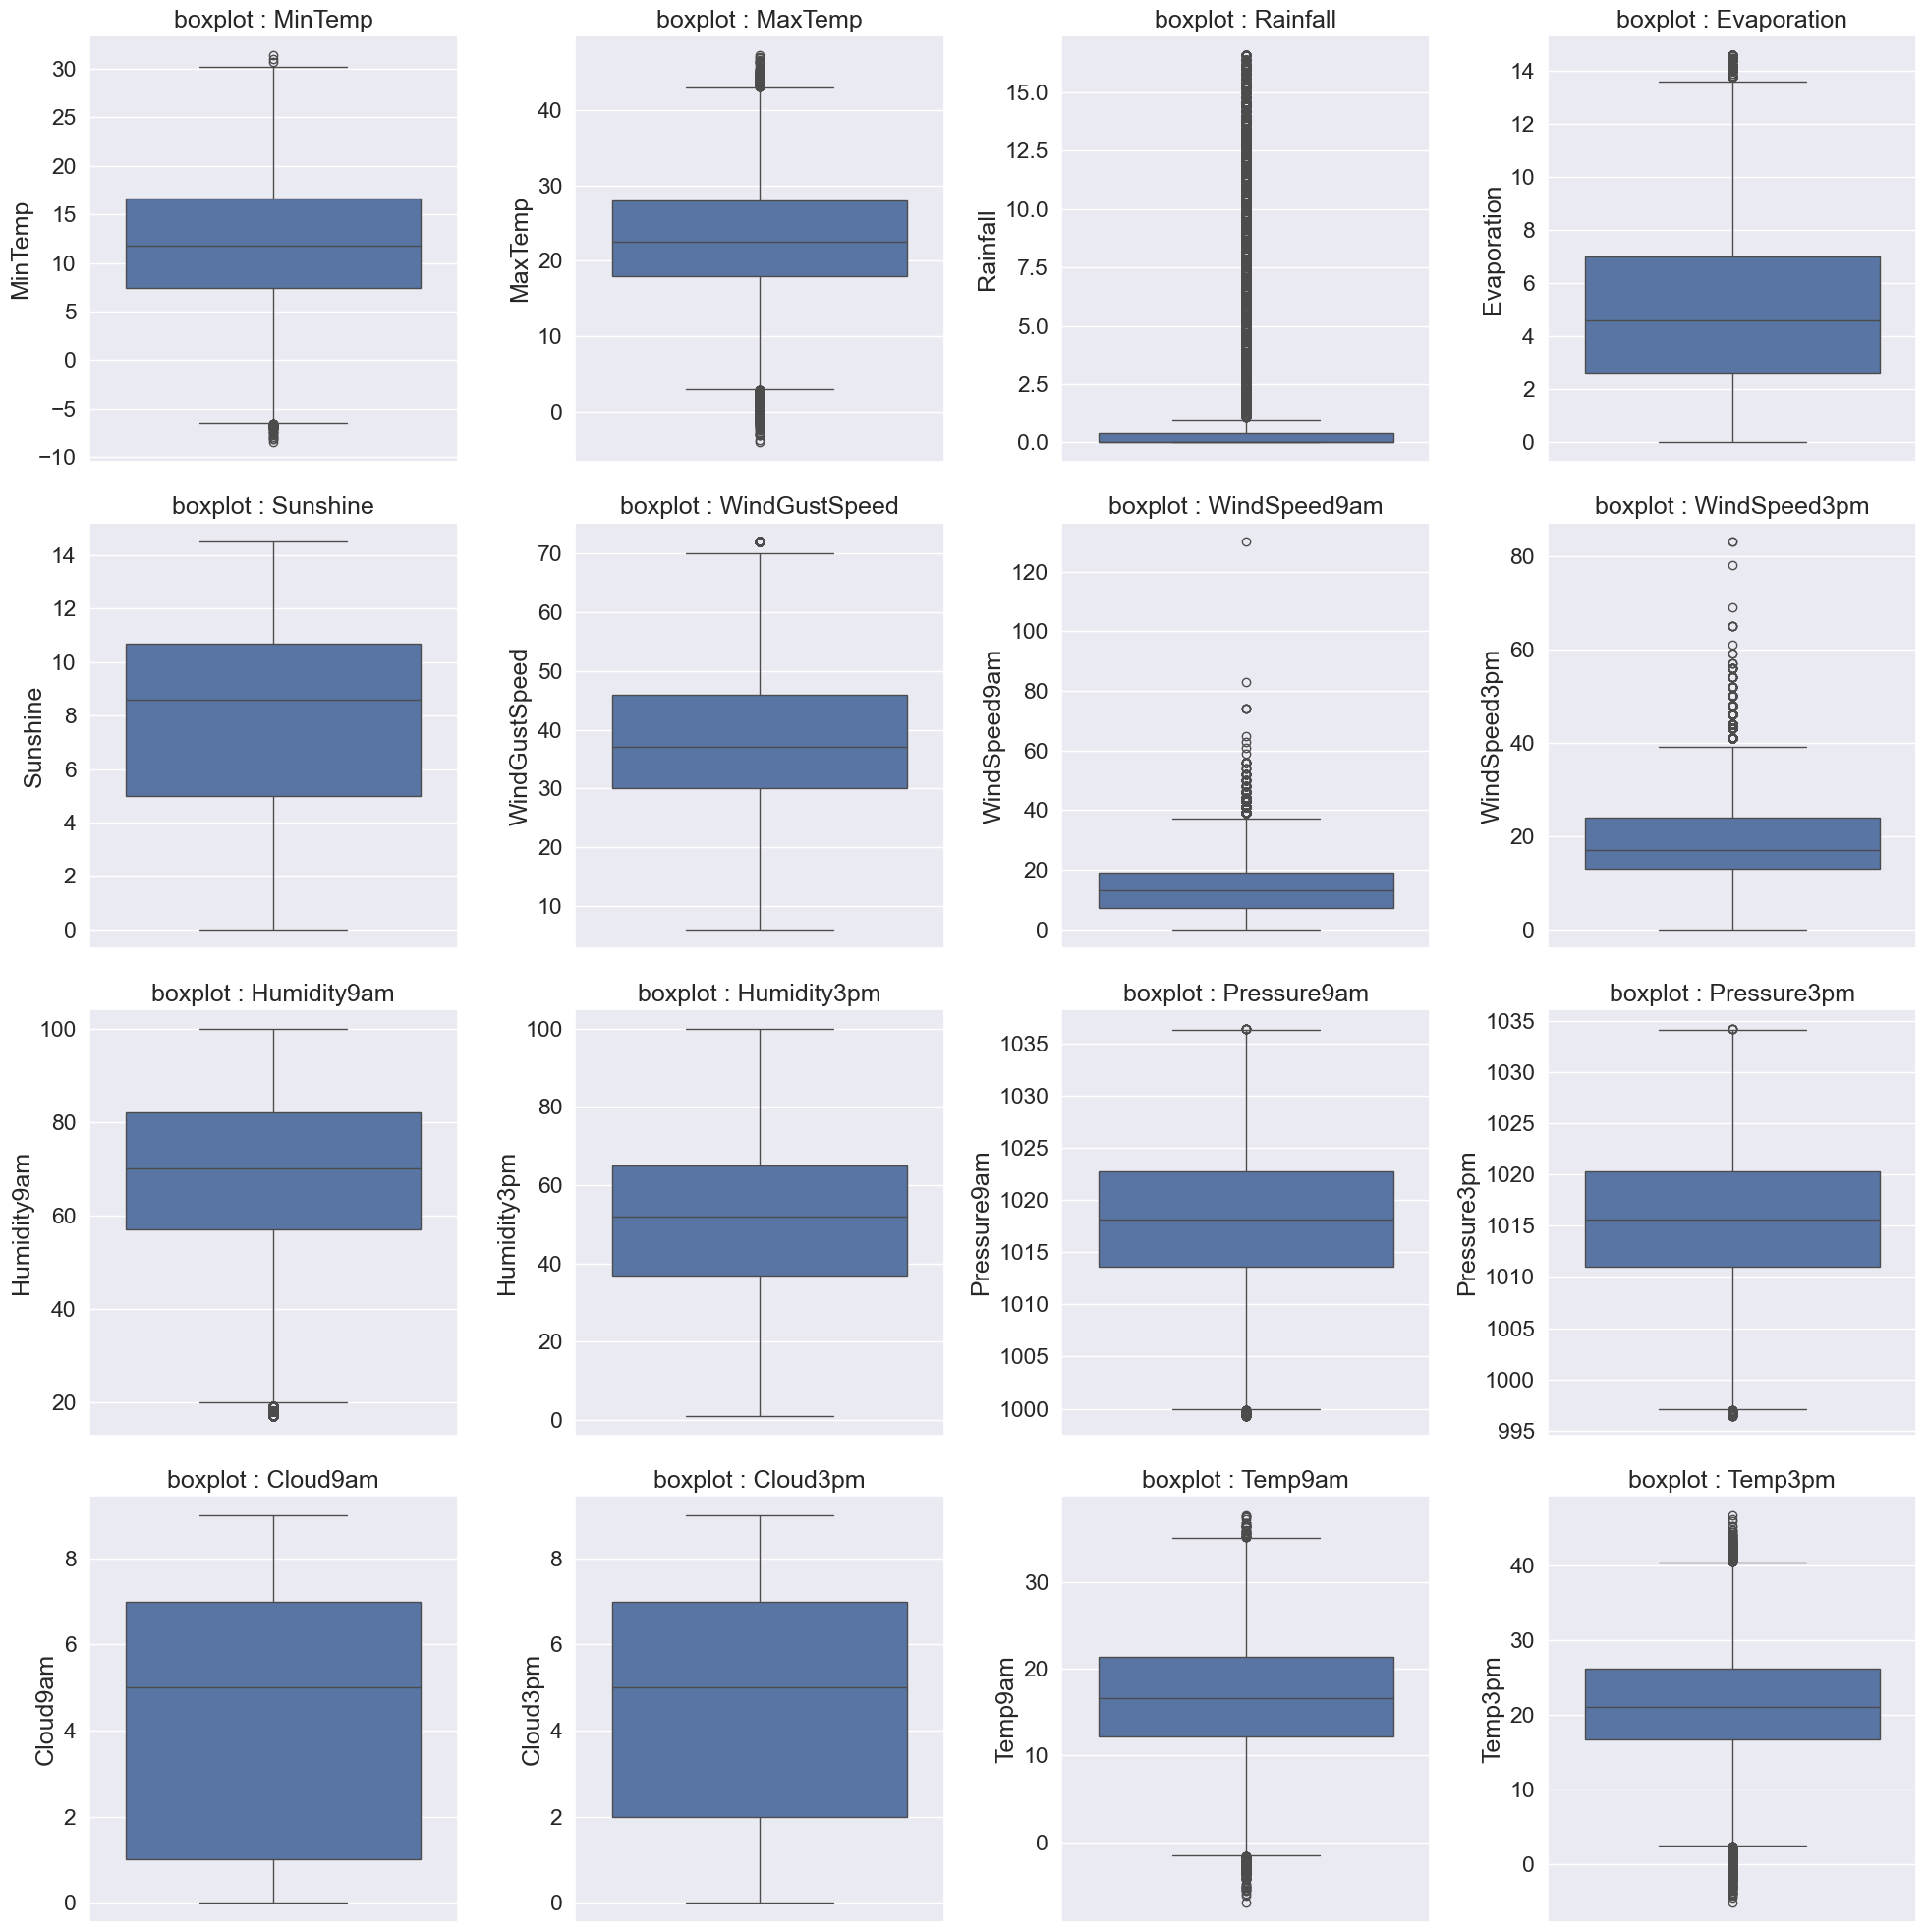

In [36]:
nrows, ncols = 4,4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,20)

axs = axs.flatten()

for i, col in enumerate(num_cols):
    ax = sns.boxplot(data=df, y=col, ax=axs[i])
    ax.set_title('boxplot : ' + col)

plt.tight_layout()

In [37]:
df.isnull().mean().sort_values()

Date             0.000000
Location         0.000000
MaxTemp          0.008897
MinTemp          0.010560
Temp9am          0.012267
WindSpeed9am     0.012611
Humidity9am      0.018400
WindSpeed3pm     0.021666
RainTomorrow     0.022744
RainToday        0.023478
Rainfall         0.023478
Temp3pm          0.025058
WindDir3pm       0.029829
Humidity3pm      0.031282
WindGustSpeed    0.072786
WindGustDir      0.073220
WindDir9am       0.075931
Pressure3pm      0.105647
Pressure9am      0.105962
Cloud9am         0.389653
Cloud3pm         0.413805
Evaporation      0.437014
Sunshine         0.483640
dtype: float64

In [38]:
print(cat_cols)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [39]:
print(num_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [40]:
df[cat_cols].isnull().mean().sort_values()

Date            0.000000
Location        0.000000
RainTomorrow    0.022744
RainToday       0.023478
WindDir3pm      0.029829
WindGustDir     0.073220
WindDir9am      0.075931
dtype: float64

In [41]:
df[num_cols].isnull().mean().sort_values()

MaxTemp          0.008897
MinTemp          0.010560
Temp9am          0.012267
WindSpeed9am     0.012611
Humidity9am      0.018400
WindSpeed3pm     0.021666
Rainfall         0.023478
Temp3pm          0.025058
Humidity3pm      0.031282
WindGustSpeed    0.072786
Pressure3pm      0.105647
Pressure9am      0.105962
Cloud9am         0.389653
Cloud3pm         0.413805
Evaporation      0.437014
Sunshine         0.483640
dtype: float64

In [42]:
for col in num_cols:
    if df[col].isnull().mean() > 0:
        col_median = df[col].median()
        df[col].fillna(col_median, inplace=True)

In [43]:
cat_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for col in cat_cols:
    col_mode = df[col].mode()[0]
    df[col].fillna(col_mode, inplace=True)

In [44]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.6,8.6,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.6,8.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,8.6,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.6,8.6,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.6,8.6,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [45]:
df.drop(['Date'], axis=1, inplace=True)

In [46]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.6,8.6,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.6,8.6,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.6,8.6,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.6,8.6,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.6,8.6,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [47]:
df.isnull().mean().sort_values()

Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RainTomorrow     0.022744
dtype: float64

In [48]:
df.shape

(133529, 22)

In [49]:
df.dropna(subset=['RainTomorrow'], inplace=True)
df['RainTomorrow']

0         No
1         No
2         No
3         No
4         No
          ..
133523    No
133524    No
133525    No
133526    No
133527    No
Name: RainTomorrow, Length: 130492, dtype: object

In [50]:
df.isnull().mean().sort_values()

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [51]:
df.shape

(130492, 22)

In [52]:
df['RainToday'].replace({'No':0, 'Yes':1}, inplace=True)
df['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace=True)

In [53]:
df = pd.get_dummies(df, columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location'])

In [54]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,4.6,8.6,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,False,False
1,7.4,25.1,0.0,4.6,8.6,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,False
2,12.9,25.7,0.0,4.6,8.6,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,False
3,9.2,28.0,0.0,4.6,8.6,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.6,8.6,41.0,7.0,20.0,82.0,33.0,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df.shape

(130492, 115)

In [56]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [57]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,4.6,8.6,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,False,False
1,7.4,25.1,0.0,4.6,8.6,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,False
2,12.9,25.7,0.0,4.6,8.6,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,False
3,9.2,28.0,0.0,4.6,8.6,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.6,8.6,41.0,7.0,20.0,82.0,33.0,...,False,False,False,False,False,False,False,False,False,False


In [58]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2024)

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('랜덤 포레스트 Accuracy (after removing outliers):', score)

랜덤 포레스트 Accuracy (after removing outliers): 0.8583087474615886


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     20784
           1       0.77      0.43      0.55      5315

    accuracy                           0.86     26099
   macro avg       0.82      0.70      0.74     26099
weighted avg       0.85      0.86      0.84     26099



In [62]:
import xgboost as xgb

In [64]:
model = xgb.XGBClassifier()

In [65]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
y_pred = model.predict(X_test)

In [67]:
score = accuracy_score(y_test, y_pred)

In [68]:
print('정확도 :', score)

정확도 : 0.8624851526878424


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     20784
           1       0.74      0.51      0.60      5315

    accuracy                           0.86     26099
   macro avg       0.81      0.73      0.76     26099
weighted avg       0.85      0.86      0.85     26099

